In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# **Neural Network Type Classification | TMNIST**

# Abstract:
Because they can learn and get better over time, neural networks and deep learning have grown in popularity in recent years. The structure and operation of the human brain, which consists of layers of interconnected nodes that process and evaluate input, served as an inspiration for these artificial intelligence models. Large volumes of labeled data are used to train these networks using deep learning techniques, which enables them to spot patterns and make precise predictions in a variety of applications, including picture and speech recognition, natural language processing, and autonomous driving. Although neural networks and deep learning have achieved amazing success in a number of disciplines, they also come with a number of important drawbacks, such as the requirement for a lot of data, a lot of computer power, and findings that are difficult to comprehend.

**Convolutional Neural Networks(CNN):**

Applications in computer vision and image processing have been transformed by deep learning algorithms known as convolutional neural networks (CNNs). CNNs are made to automatically extract features from images by running them through layers of connected nodes, with each node executing convolutions and pooling operations to extract and downsample the most crucial data. These qualities enable CNNs to precisely categorize images, split them into various regions, or produce entirely new images. Numerous applications, such as object identification and recognition, medical image analysis, and self-driving automobiles, have made extensive use of CNNs. 

However, in order for CNN training to be successful, a significant amount of labeled data must be available.Because of this, research is always being done to increase the effectiveness and reliability of CNNs, using techniques like transfer learning, network compression, and generative adversarial networks. CNNs are well-positioned to continue influencing the direction of computer vision and image analysis despite these obstacles.

![](http://editor.analyticsvidhya.com/uploads/89175cnn_banner.png)

# Aim:

The following 94 alphabetic characters will be used in our effort to build and train an artificial neural network using thousands of Typeface MNIST-style images:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This dataset, which is a component of the Computational Creativity and Cognitive Type projects, has more than 281,000 photographs.

TensorFlow will serve as the backend, and we'll use the Keras Python API.





# **Importing required packages and libraries**

Installing the required libraries is necessary in order to complete our desired tasks and objectives.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications import VGG16
import warnings
warnings.filterwarnings("ignore")

In [4]:
#reading the dataset
df = pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Shape of the dataset
df.shape

(274093, 786)

In [6]:
#Total no. of unique classes present
no_classes = df['labels'].nunique()
print('Total no. of unique classes: ', no_classes)

#Printing all the unique classes
print(df['labels'].unique())

#Total no. of unique fonts
no_fonts = df['names'].nunique()
print('Total no. of unique fonts: ', no_fonts)

Total no. of unique classes:  94
['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
Total no. of unique fonts:  2990


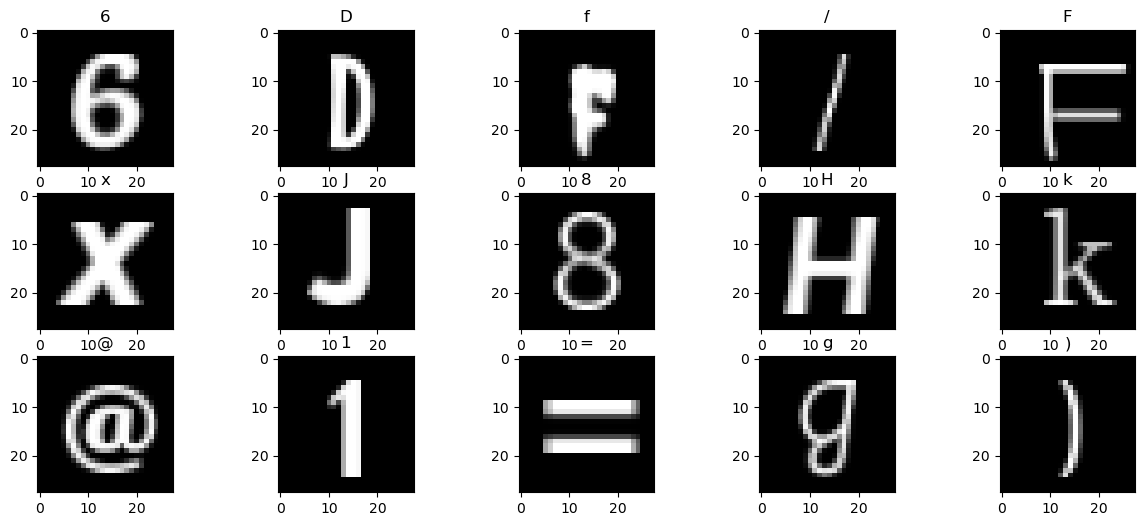

In [7]:
#defining the class column and removing other unneccesary columns
y=df['labels']
X=df.drop(['names','labels'],axis=1)
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(15, 6))
for i in range(15):  
  plt.subplot(3,5,i+1)
  plt.title(y.iloc[i])
  plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

# **Training the Dataset**

In [8]:
#Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
#Checking the shape of y_train
y_train.shape

(205569,)

In [10]:
print('Value counts in y_train: ', y_train.value_counts())

Value counts in y_train:  4    2269
,    2267
0    2266
7    2262
5    2260
     ... 
h    2115
u    2113
R    2109
U    2099
g    2088
Name: labels, Length: 94, dtype: int64


Text(0, 0.5, 'Count')

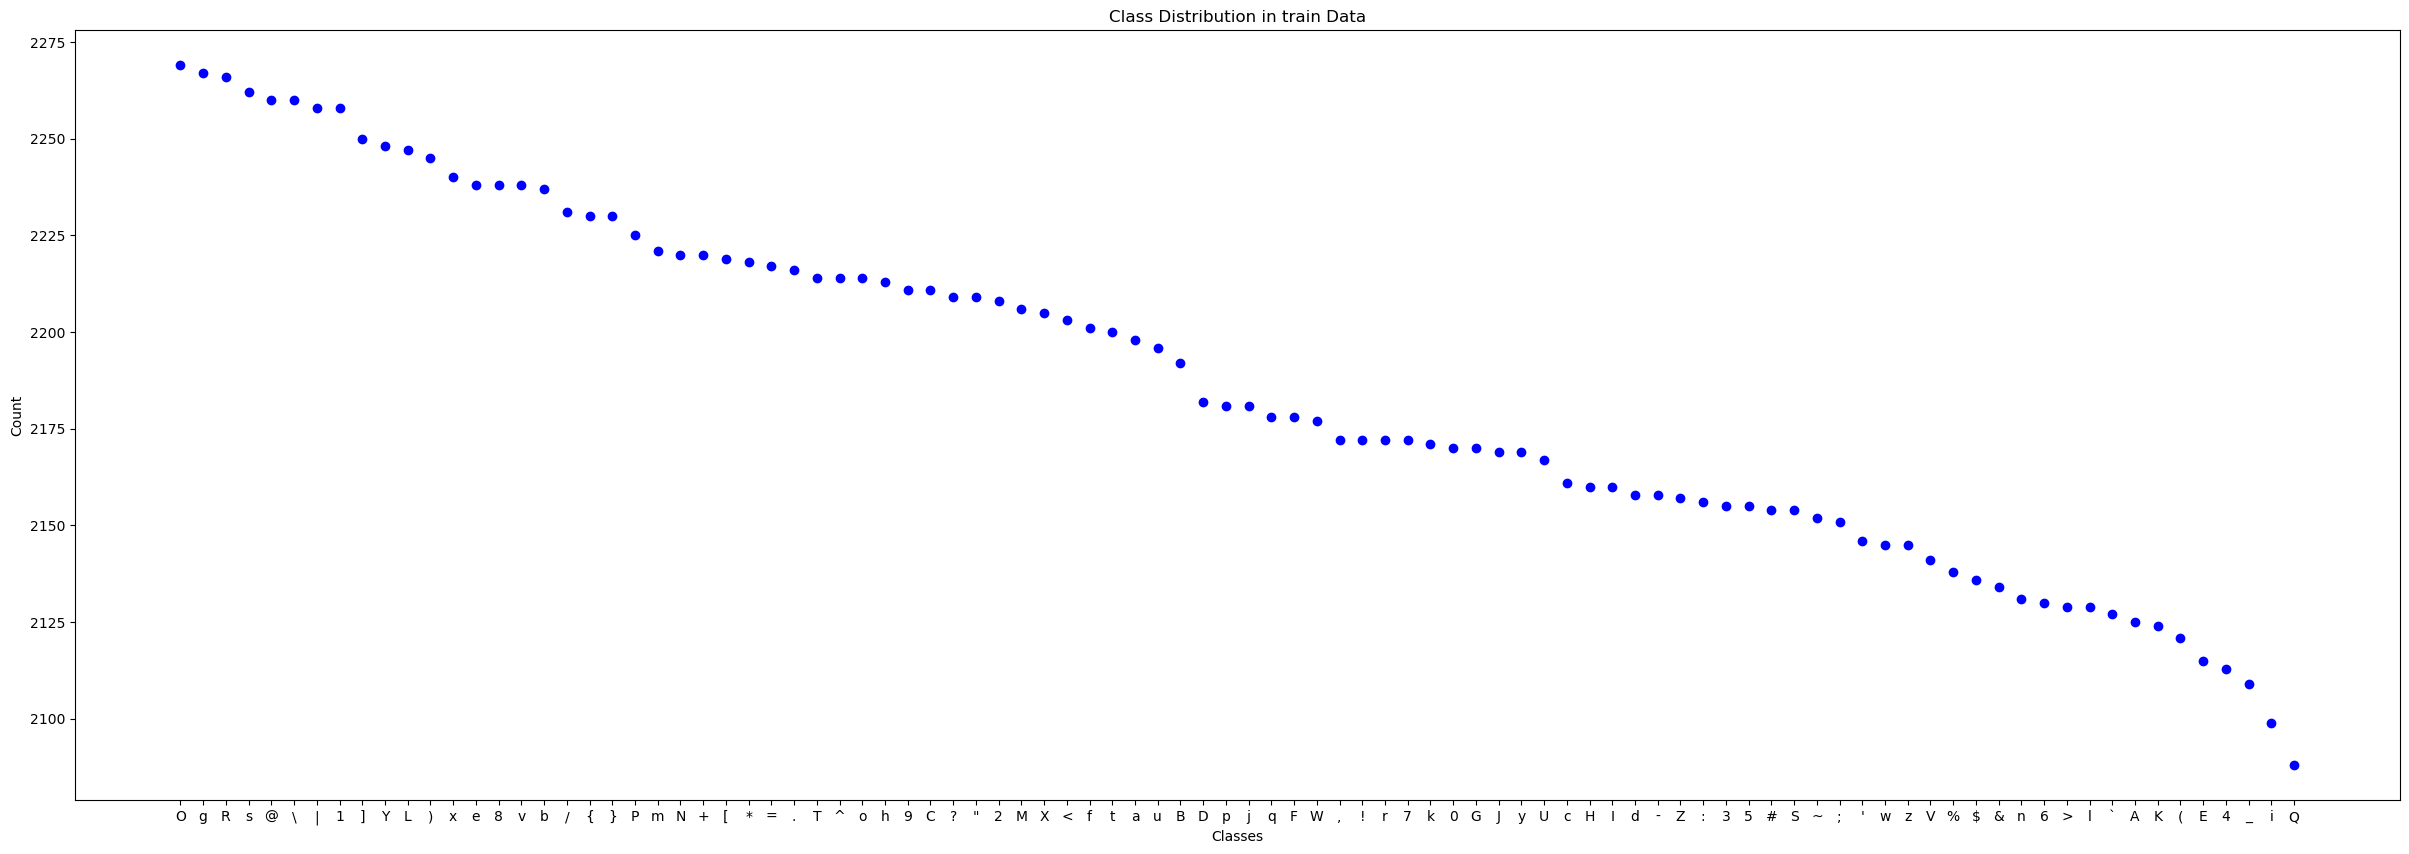

In [11]:
#checking the distribution of train dataset

plt.figure(figsize=(30, 10))
plt.scatter(y_train.unique(),y_train.value_counts(),color='blue')
plt.title('Class Distribution in train Data')
plt.xlabel('Classes')
plt.ylabel('Count')

In [12]:
#Converting pixel values to 0-1
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [13]:
#Performing OneHotEncoding to transform values in between 0 and 1
onehotencoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train_enc = onehotencoder.fit_transform(y_train.values.reshape(-1,1))
y_test_enc = onehotencoder.fit_transform(y_test.values.reshape(-1,1))

# Reshaping the images

The array X_train comprises a group of grayscale images, each of which is 28x28 pixels in size and has just one channel. Three channels, or the RGB colors (red, green, and blue), would be present if the images were in color.

We have rescaled the pixel values in each image such that they now range from 0 to 1, rather than their original range of 0 to 255, in order to prepare the image data for training a machine learning model. The normalizing procedure makes sure that each pixel's value has a nearly equal scale, which helps enhance the model's training and accuracy.

In order to prepare the image data for machine learning tasks, we have reshaped and normalized it, making sure that each image has the same size and channel representation while scaling the pixel values for reliable training.

In [14]:
X_train_n=X_train.values.reshape(X_train.shape[0],28,28)
X_test_n=X_test.values.reshape(X_test.shape[0],28,28)

# **Creating Neural Model**

# Layers in Neural Network:

Using the Keras Sequential API, the following code defines a neural network (NN). The following are the layers of the NN:

**Flatten layer:** This layer converts the 2D input data of shape (28, 28) to a 1D array of shape (784), which can be used as input for the subsequent layers.

**Dense layer:** This layer has 512 neurons and uses the ReLU activation function, which applies the rectified linear unit activation function to the output of each neuron. This layer performs a linear transformation on the input data followed by the ReLU activation.

**Dense layer:** This layer has 256 neurons and uses the ReLU activation function.

**Dense layer:** This layer has 128 neurons and uses the ReLU activation function.

**Dense layer:** This layer has 64 neurons and uses the ReLU activation function.

**Dense layer:** This layer has 32 neurons and uses the ReLU activation function.

**Dense layer:** This is the output layer and has a number of neurons equal to the number of classes in the dataset. It uses the softmax activation function, which outputs a probability distribution over the classes.

Categorical cross-entropy is employed as the loss function, and the Adam optimizer is used to train the NN. Accuracy is the parameter used to assess how well the NN performed during training. The number of parameters in each layer and the overall number of parameters in the NN are included in the summary of the NN that is printed using the nn.summary() function.


In [15]:
#Creating a Neural Network Model
nn = Sequential()
nn.add(Flatten(input_shape=(28,28)))
nn.add(Dense(512,activation='relu'))
nn.add(Dense(256,activation='relu'))
nn.add(Dense(128,activation='relu'))
nn.add(Dense(64,activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(no_classes, activation='softmax'))
nn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 94)                3

In [16]:
#Fitting the Neural Model
nn_model = nn.fit(X_train_n, y_train_enc, epochs=10, validation_data=(X_test_n,y_test_enc),verbose=2,batch_size=128)

Epoch 1/10
1607/1607 - 19s - loss: 0.8083 - accuracy: 0.7825 - val_loss: 0.5020 - val_accuracy: 0.8492 - 19s/epoch - 12ms/step
Epoch 2/10
1607/1607 - 17s - loss: 0.4299 - accuracy: 0.8638 - val_loss: 0.4228 - val_accuracy: 0.8653 - 17s/epoch - 10ms/step
Epoch 3/10
1607/1607 - 16s - loss: 0.3629 - accuracy: 0.8804 - val_loss: 0.4075 - val_accuracy: 0.8766 - 16s/epoch - 10ms/step
Epoch 4/10
1607/1607 - 17s - loss: 0.3259 - accuracy: 0.8900 - val_loss: 0.3534 - val_accuracy: 0.8890 - 17s/epoch - 10ms/step
Epoch 5/10
1607/1607 - 16s - loss: 0.2906 - accuracy: 0.9008 - val_loss: 0.3567 - val_accuracy: 0.8893 - 16s/epoch - 10ms/step
Epoch 6/10
1607/1607 - 17s - loss: 0.2653 - accuracy: 0.9084 - val_loss: 0.3648 - val_accuracy: 0.8895 - 17s/epoch - 10ms/step
Epoch 7/10
1607/1607 - 16s - loss: 0.2458 - accuracy: 0.9132 - val_loss: 0.3292 - val_accuracy: 0.9016 - 16s/epoch - 10ms/step
Epoch 8/10
1607/1607 - 16s - loss: 0.2289 - accuracy: 0.9191 - val_loss: 0.3349 - val_accuracy: 0.9007 - 16s/ep

In [17]:
#Getting the accuracy on the train and test data
accuracy = nn_model.history['accuracy'][-1]
print(f'Train Accuracy: {accuracy*100:.3}%')
accuracy = nn_model.history['val_accuracy'][-1]
print(f'Test Accuracy: {accuracy*100:.3}%')

Train Accuracy: 92.6%
Test Accuracy: 90.4%


# **Plotting the graph indicating Loss and Accuracy over Epochs**

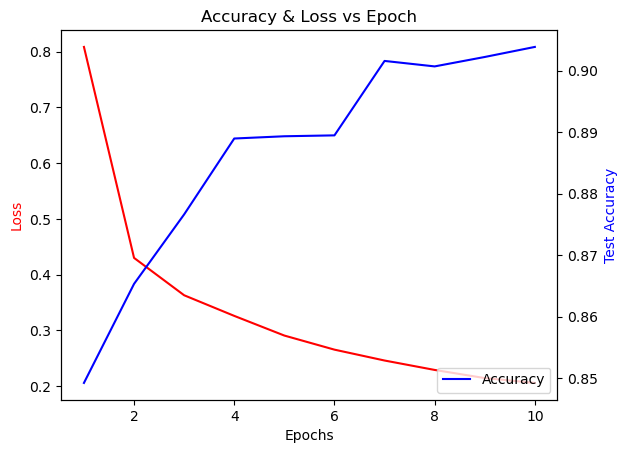

In [18]:
# nn_model is the trained model returned by the fit() method
# X_train_norm, y_train_enc, X_test_norm, y_test_enc are preprocessed data

# Get the loss and accuracy values from the training history
loss_log = nn_model.history['loss']
accuracy_log = nn_model.history['val_accuracy']
epoch_log = range(1, len(loss_log)+1)

# Plot the loss and accuracy values
fig, ax1 = plt.subplots()
plt.title("Accuracy & Loss vs Epoch")
ax2 = ax1.twinx()
ax1.plot(epoch_log, loss_log, 'r-', label='Loss')
ax2.plot(epoch_log, accuracy_log, 'b-', label='Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Test Accuracy', color='b')
plt.legend(loc='lower right')
plt.show()


# **Explanation of the above graph**

The above plot illustrates how the loss and accuracy of a trained neural network model change with the quantity of training epochs.

The model has been trained on the whole training dataset for a given number of epochs, which are represented on the x-axis. The loss, which is a gauge of how effectively the model is foretelling the right output, is shown on the left-hand y-axis. The accuracy, which is a metric of how frequently the model predicts the right output, is shown on the right y-axis.

Two lines are depicted in the plot: a blue line for accuracy and a red line for loss. The accuracy should rise and the loss should decrease as the number of epochs rises. The ideal scenario is for the accuracy to be as high and the loss to be as small as possible.

The graphic also demonstrates that as the model continues to learn from the training data, the loss initially reduces quickly during the first few epochs before decreasing more slowly. As the model gets better at making correct predictions, the accuracy increases quickly at first and subsequently grows more gradually.

The plot can be used to assess the effectiveness of the trained model and determine if it is over- or underfitted. Overfitting may be present if the loss on the training data keeps down but the loss on the validation data starts to rise. It may also indicate overfitting if the accuracy on the training data is significantly higher than the accuracy on the validation data.








# **Creating a CNN Model**

# Layers in CNN:

For image identification and computer vision tasks, convolutional neural networks (CNNs) are a type of neural network that are frequently employed. A CNN normally consists of several layers, each of which runs an analysis on the input data in a unique way. The most typical layers in a CNN are as follows:

**Input Layer:** The input layer receives the input image and transmits it to the following layer.

**Convolutional Neural Network Layer:** A series of teachable filters are applied to the input image by the convolutional layer. Each filter provides a feature map that emphasizes the position of the feature it has detected in the image, such as edges or textures.

**Pooling Layer:** The convolutional layer's feature maps are produced by the pooling layer, which scales them down in terms of spatial dimensions. 

**Activation Layer:** The activation layer takes the output of the convolutional layer and applies a non-linear activation function, such as ReLU. The model gains non-linearity as a result, enabling it to pick up on more intricate aspects.

**Fully connected layer:** This layer applies a linear modification to the output of the preceding layer to create a set of outputs. The dense layer of a conventional neural network is comparable to this layer.

**Output Layer:** The model's ultimate output, which may be a class label or a regression value, is produced by the output layer.



Layers we have used here for image analysis are as follows:



1. **Conv2D layer:** This layer applies 256 filters of size 5x5 to the input image, with a ReLU activation function. The input shape is (28,28,1), indicating an image of size 28x28 with a single channel (grayscale).

2. **MaxPooling2D layer:** This layer reduces the spatial dimensions of the output of the previous layer by a factor of 2.

3. **Conv2D layer:** This layer applies 128 filters of size 3x3 to the output of the previous layer, with a ReLU activation function.

4. **MaxPooling2D layer:** This layer again reduces the spatial dimensions of the output by a factor of 2.

5. **Flatten layer:** This layer flattens the output of the previous layer into a 1D array.

6. **Dense layer:** This layer has 128 neurons with a ReLU activation function.

7. **Dense layer:** This layer has 64 neurons with a ReLU activation function.

8. **Dense layer:** This layer has 32 neurons with a ReLU activation function.

9. **Dense layer:** This layer has no_classes (the number of output classes) neurons with a softmax activation function.

The model is compiled using the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric

In [19]:
nn1 = Sequential()
nn1.add(Conv2D(256,(5,5),activation='relu',input_shape=(28,28,1)))
nn1.add(MaxPooling2D(2,2))
nn1.add(Conv2D(128,(3,3),activation='relu'))
nn1.add(MaxPooling2D(2,2))

nn1.add(Flatten())
nn1.add(Dense(128,activation='relu'))
nn1.add(Dense(64,activation='relu'))
nn1.add(Dense(32,activation='relu'))
nn1.add(Dense(no_classes,activation='softmax'))

nn1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
nn1.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 256)       6656      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [20]:
X_train_n=X_train_n.reshape((X_train_n.shape[0],28,28,1))
X_test_n=X_test_n.reshape((X_test_n.shape[0],28,28,1))

In [22]:
#Fitting the Model 2
nn_model1 = nn1.fit(X_train_n, y_train_enc, epochs=5, validation_data=(X_test_n,y_test_enc),verbose=2,batch_size=128)

Epoch 1/5
1607/1607 - 804s - loss: 0.2861 - accuracy: 0.9087 - val_loss: 0.2766 - val_accuracy: 0.9148 - 804s/epoch - 501ms/step
Epoch 2/5
1607/1607 - 805s - loss: 0.2297 - accuracy: 0.9260 - val_loss: 0.2450 - val_accuracy: 0.9241 - 805s/epoch - 501ms/step
Epoch 3/5
1607/1607 - 801s - loss: 0.2005 - accuracy: 0.9329 - val_loss: 0.2392 - val_accuracy: 0.9250 - 801s/epoch - 498ms/step
Epoch 4/5
1607/1607 - 797s - loss: 0.1789 - accuracy: 0.9396 - val_loss: 0.2349 - val_accuracy: 0.9255 - 797s/epoch - 496ms/step
Epoch 5/5
1607/1607 - 798s - loss: 0.1632 - accuracy: 0.9439 - val_loss: 0.2115 - val_accuracy: 0.9354 - 798s/epoch - 497ms/step


In [23]:
#Getting the accuracy on the train data
train_accuracy = nn_model1.history['accuracy'][-1]
test_accuracy = nn_model1.history['val_accuracy'][-1]
print(f'Train Accuracy: {train_accuracy*100:.3}%')
print(f'Test Accuracy: {test_accuracy*100:.3}%')

Train Accuracy: 94.4%
Test Accuracy: 93.5%


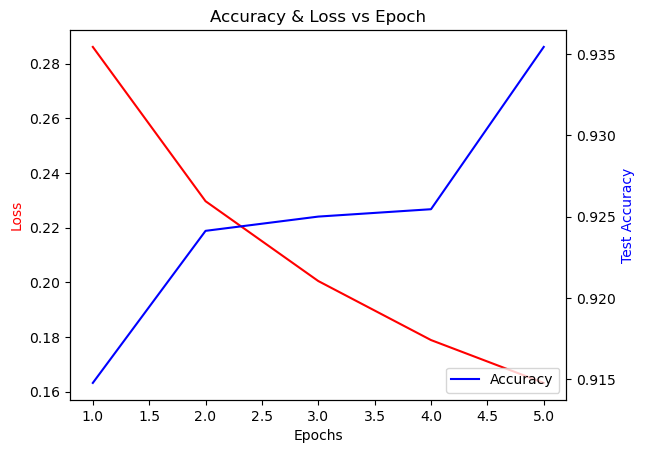

In [24]:
# nn_model is the trained model returned by the fit() method
# X_train_norm, y_train_enc, X_test_norm, y_test_enc are preprocessed data

# Get the loss and accuracy values from the training history
loss_log1 = nn_model1.history['loss']
accuracy_log1 = nn_model1.history['val_accuracy']
epoch_log1= range(1, len(loss_log1)+1)

# Plot the loss and accuracy values
fig, ax1 = plt.subplots()
plt.title("Accuracy & Loss vs Epoch")
ax2 = ax1.twinx()
ax1.plot(epoch_log1, loss_log1, 'r-', label='Loss')
ax2.plot(epoch_log1, accuracy_log1, 'b-', label='Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Test Accuracy', color='b')
plt.legend(loc='lower right')
plt.show()

# **Explanantion of the above graph**

The performance of a neural network model during training is depicted in the graph above. The model has iterated over the training dataset a certain number of times, or epochs, as shown on the x-axis. The model's loss value, which is displayed on the y-axis on the left, shows how well the model fits the training set of data. The test accuracy of the model, which is displayed on the right y-axis and shows how well the model performs on a different test dataset.

The loss value, shown as a red line, gets smaller with each epoch. This shows that as the model passes through more epochs, it becomes better at fitting the training set of data. The test accuracy is represented by the blue line, which becomes better with each epoch. This shows that the model's capacity for making precise predictions based on test data is growing.

Overall, the graph demonstrates that the model is getting better at fitting training data and making precise predictions about test data. With more epochs, the model's performance may not necessarily keep getting better, as overfitting can happen if the model is too complicated and begins to fit the data's noise rather than its underlying patterns.

# **Conclusion**

* The Convolutional Neural Network model shows more accuracy than the traditional Neural Networks model
* The accuracy achieved by the CNN model is 93.5%

# **References**

* Images: https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/
* https://www.kaggle.com/nikbearbrown/code
* https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0

# **License**

Copyright (c) 2023 Shreyas Dasari

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.